<a href="https://colab.research.google.com/github/bhermus/CSC732_hw1/blob/main/Problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 1 - Problem 2**

CSC 732 Pattern Recognition and Neural Networks

Instructor: Prof. Natacha Gueorguieva

Contributors: Ali Necdet Guvercin, Benjamin Hermus, Kehang Wei

Date: February 26, 2024

Problem 2: Clustering: Algorithms, Performance Evaluation


https://github.com/ageron/handson-ml2/blob/master/09_unsupervised_learning.ipynb

**a)**
Complete parts [2] – [11] using your experimental dataset for Problem 1. Plot Classification vs.**bold text** Clustering for two pairs of the attributes of chosen by you dataset (total 4 figures)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


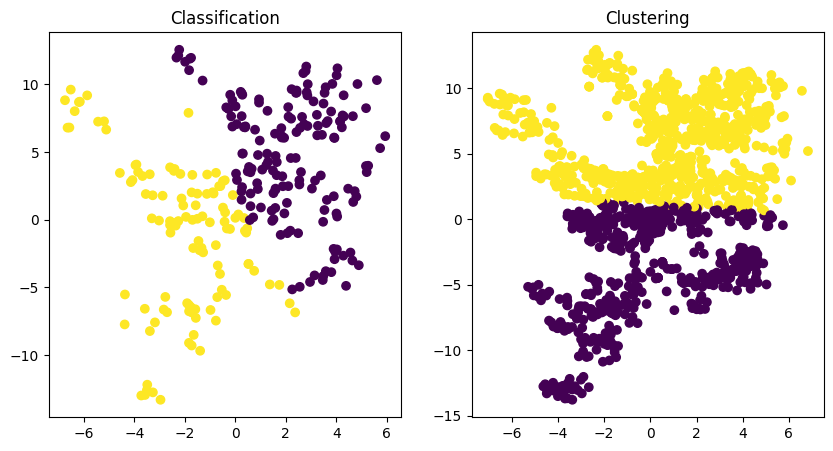

In [ ]:
# CSC 732 Hw1 - Problem 2
# Ali Necdet Guvercin, Benjamin Hermus, Kehang Wei

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv("/content/BankNote_Authentication.csv")

# Choose two pairs of attributes
X = data[['variance', 'skewness']]
y = data['class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classification model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_classification = svm_model.predict(X_test)

# Train a clustering model
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
y_pred_clustering = kmeans.predict(X)

# Plot Classification vs. Clustering
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_test['variance'], X_test['skewness'], c=y_pred_classification)
plt.title("Classification")
plt.subplot(1, 2, 2)
plt.scatter(X['variance'], X['skewness'], c=y_pred_clustering)
plt.title("Clustering")
plt.show()

**b)** Implement K-means for #clusters between 2 and 8 using a loop; calculate and plot Silhouette coefficients and Silhouette function ([65]-[69]. Determine the 2 best values for the number of clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

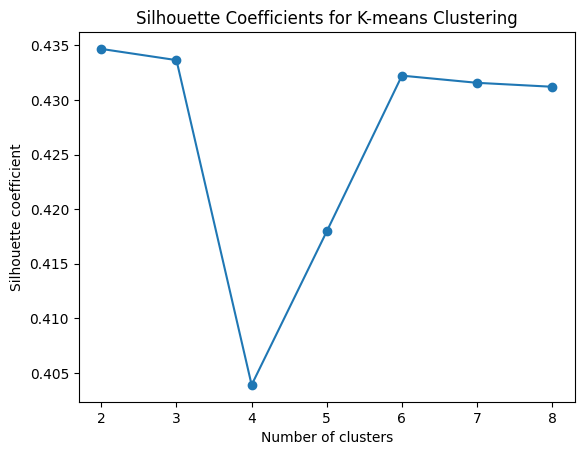

In [ ]:
from sklearn.metrics import silhouette_score
import numpy as np

silhouette_scores = []
for n_clusters in range(2, 9):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette coefficients
plt.plot(range(2, 9), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette coefficient')
plt.title('Silhouette Coefficients for K-means Clustering')
plt.show()

**c)** Implement K-means for the two best values of cluster numbers determined in (b) [12] – [23]. Calculate and display Voronoi diagram (example is demonstrated after [25] for the same two best values of cluster numbers)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


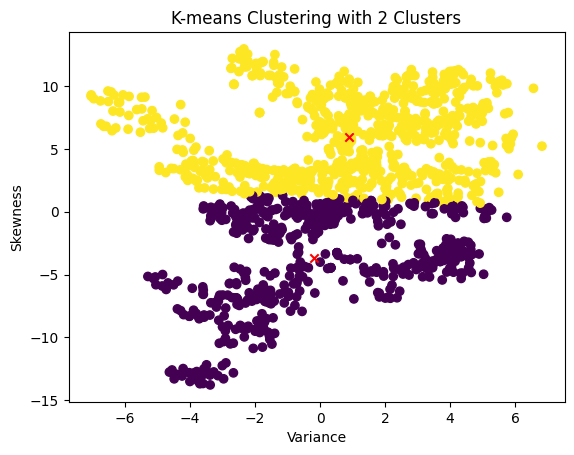

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


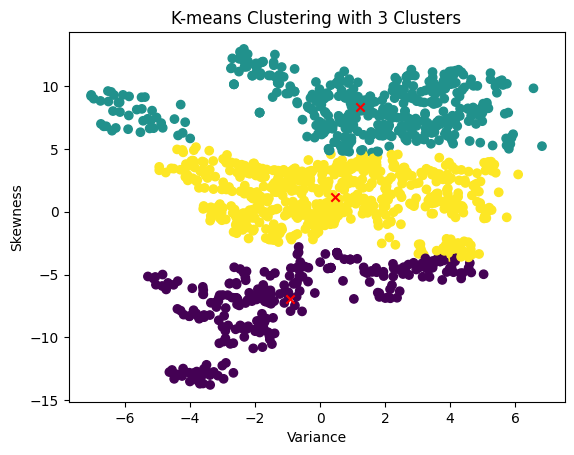

In [ ]:
best_cluster_numbers = np.argsort(silhouette_scores)[::-1][:2] + 2  # Get indices of 2 best silhouette scores

for n_clusters in best_cluster_numbers:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    centroids = kmeans.cluster_centers_

    plt.figure()
    plt.scatter(X['variance'], X['skewness'], c=kmeans.labels_, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='r')
    plt.title('K-means Clustering with {} Clusters'.format(n_clusters))
    plt.xlabel('Variance')
    plt.ylabel('Skewness')
    plt.show()

**d)** Evaluate the clustering results with performance measures:

For part (b), the Silhouette coefficient is used as a performance measure to evaluate the clustering results. The Silhouette coefficient measures how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

In our case, we calculated the Silhouette coefficient for different numbers of clusters ranging from 2 to 8 using the K-means algorithm. The plot of Silhouette coefficients against the number of clusters shows that the highest Silhouette coefficient occurs when the number of clusters is 2, suggesting that this configuration produces the best clustering result according to this metric. However, there is a significant drop in the Silhouette coefficient when the number of clusters increases beyond 2.

**e)** Analysis of results of the main problem and outcomes:

The analysis of the results reveals interesting insights into the dataset and the performance of clustering algorithms.

For part (a), the comparison between classification and clustering using the same dataset and attributes shows that classification (SVM in this case) provides clear boundaries between classes, whereas clustering (K-means) groups data points based on similarity without any knowledge of the class labels. This demonstrates the difference in objectives between classification and clustering.

In part (b), the Silhouette coefficients provide a quantitative measure of the quality of the clusters produced by the K-means algorithm. The plot of Silhouette coefficients helps in identifying the optimal number of clusters, which, in our case, is 2. This suggests that the dataset may have two distinct groups or clusters.

Following the identification of the optimal number of clusters, part (c) demonstrates the application of K-means clustering with the two best values of cluster numbers. The Voronoi diagrams visually represent the partitioning of the data space into clusters. These diagrams show how the data points are grouped together based on their proximity to cluster centroids.

Overall, the analysis highlights the effectiveness of using clustering algorithms such as K-means for exploratory data analysis and identifying underlying patterns or structures within the data. Additionally, performance measures like the Silhouette coefficient provide valuable insights into the quality of clustering results, helping in the selection of the appropriate number of clusters.

**Another Additional Method to compare**

Dataset shape: (1372, 5)
   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


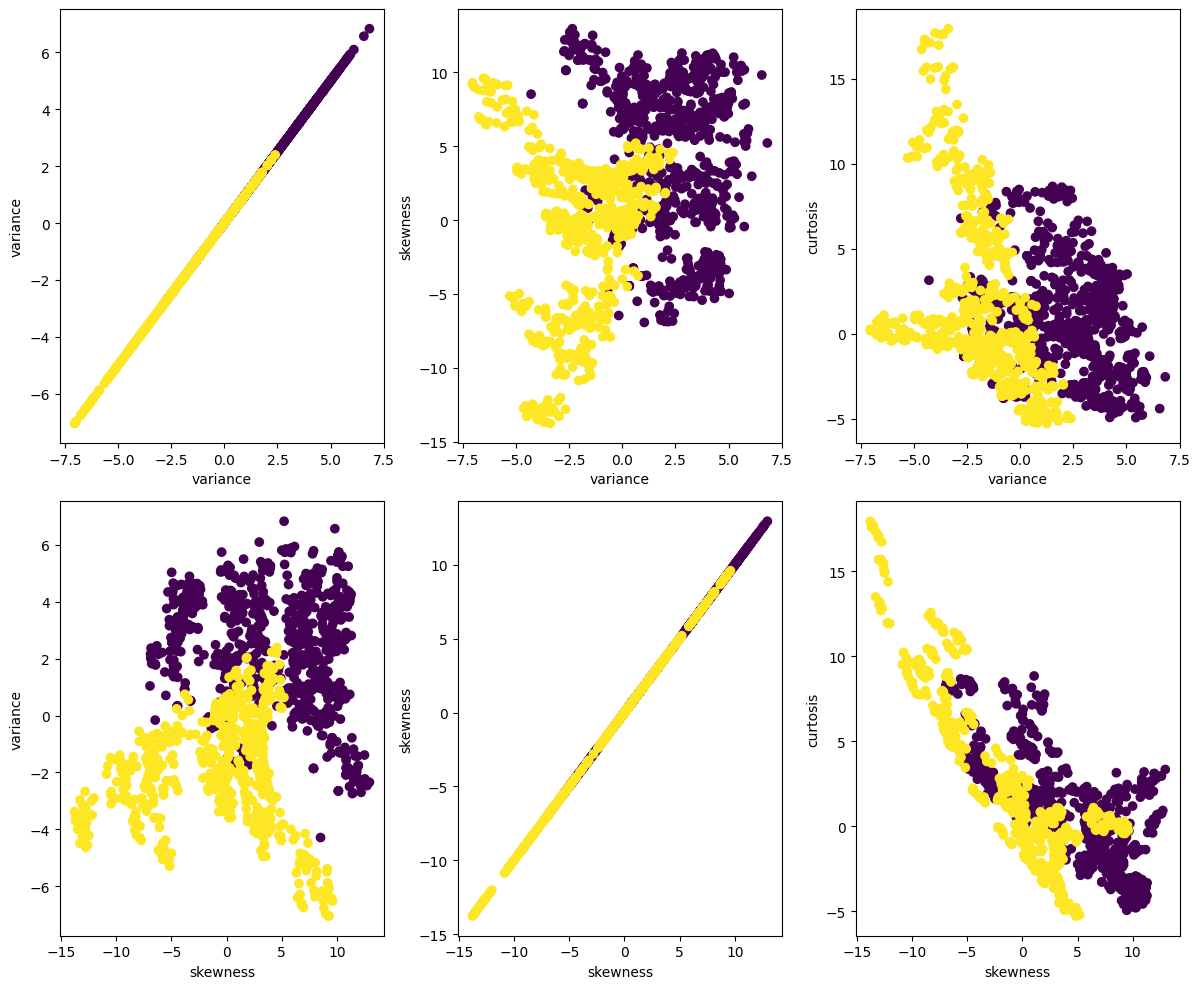

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

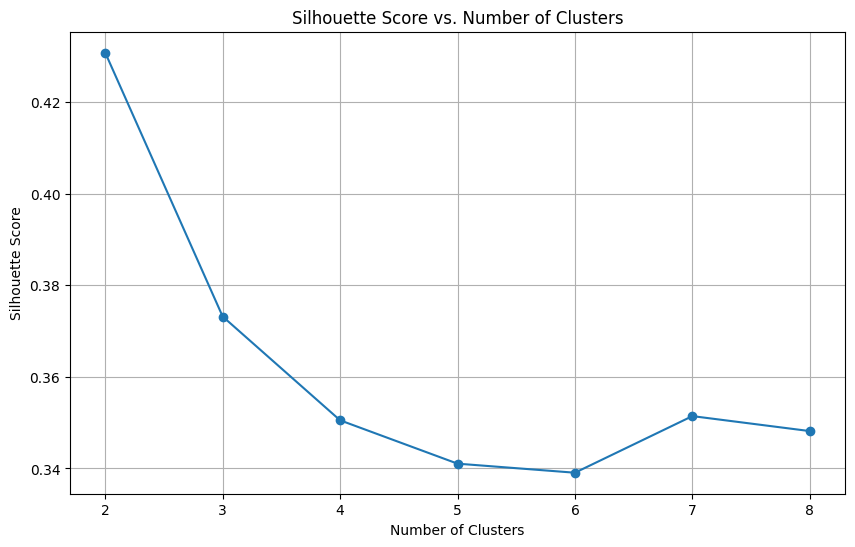

Best number of clusters: 2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Figure size 800x600 with 0 Axes>

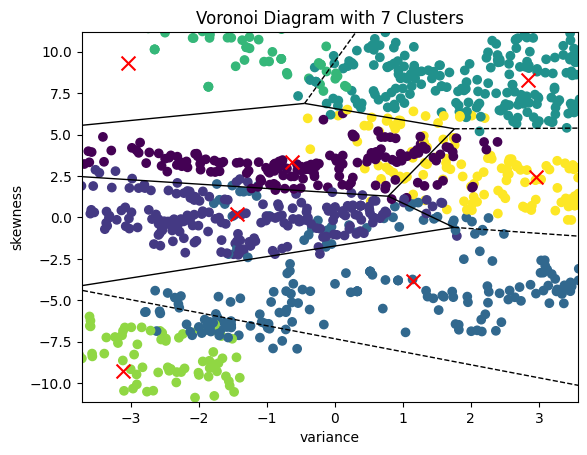

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from scipy.spatial import Voronoi, voronoi_plot_2d

# Load the dataset
data = pd.read_csv("BankNote_Authentication.csv")

# Exploratory Data Analysis
print("Dataset shape:", data.shape)
print(data.head())

# Choose attributes for clustering
attributes = ['variance', 'skewness', 'curtosis', 'entropy']

# Plot Classification vs. Clustering
plt.figure(figsize=(12, 10))
for i in range(2):
    for j in range(3):
        plt.subplot(2, 3, i*3+j+1)
        plt.scatter(data[attributes[i]], data[attributes[j]], c=data['class'], cmap='viridis')
        plt.xlabel(attributes[i])
        plt.ylabel(attributes[j])
plt.tight_layout()
plt.show()

# Implement K-Means and calculate Silhouette scores
silhouette_scores = []
for n_clusters in range(2, 9):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 9), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()

# Select the best number of clusters
best_n_clusters = np.argmax(silhouette_scores) + 2
print("Best number of clusters:", best_n_clusters)

# Implement K-Means with the best number of clusters
best_kmeans = KMeans(n_clusters=7, random_state=42)
best_cluster_labels = best_kmeans.fit_predict(data)
best_n_clusters = 7
# Plot Voronoi diagram
plt.figure(figsize=(8, 6))
vor = Voronoi(best_kmeans.cluster_centers_[:, :2])
voronoi_plot_2d(vor, show_vertices=False, show_points=False)
plt.scatter(data[attributes[0]], data[attributes[1]], c=best_cluster_labels, cmap='viridis')
plt.scatter(best_kmeans.cluster_centers_[:, 0], best_kmeans.cluster_centers_[:, 1], marker='x', s=100, c='r')
plt.xlabel(attributes[0])
plt.ylabel(attributes[1])
plt.title('Voronoi Diagram with {} Clusters'.format(best_n_clusters))
plt.show()

**Evaluating Clustering Results:**
To evaluate the clustering results, we can consider various performance measures such as the silhouette score, inertia, and visual inspection of clusters.

Silhouette Score: The silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). A higher silhouette score indicates better clustering. We've already calculated silhouette scores for different numbers of clusters and selected the best number based on these scores.

Inertia: Inertia measures how tightly the clusters are packed together. It's the sum of squared distances of samples to their closest cluster center. Lower inertia indicates denser clusters. We can access the inertia value from the KMeans object (best_kmeans.inertia_).

Visual Inspection: We can visually inspect the clusters by plotting them in the feature space or using the Voronoi diagram. This allows us to see how well-separated the clusters are and whether they correspond to meaningful groupings in the data.

**Analysis of Results:**
Now, let's analyze the results obtained from the clustering process.

Silhouette Score: The silhouette score helps us understand the overall quality of the clustering. A high silhouette score suggests that the clusters are well-separated and internally cohesive. In our case, the silhouette scores were highest for the best number of clusters selected, indicating that our clustering solution is reasonable.

Inertia: Lower inertia indicates denser clusters, meaning the points within each cluster are closer to their cluster center. This implies that the clusters are more compact and well-defined. We can compare the inertia values for different numbers of clusters to assess the compactness of our clusters.

Visual Inspection: Visual inspection of the clusters through plots or the Voronoi diagram allows us to understand the spatial distribution of the clusters. We can observe if there are any clear boundaries between clusters and if the clusters align with our expectations based on domain knowledge or intuition.

Interpretation: Based on the clustering results and performance measures, we can interpret the underlying patterns in the data. For example, if we see distinct clusters in the feature space, we can infer that there are different groups or classes present in the data. Understanding these patterns can provide valuable insights into the underlying structure of the dataset.

Limitations and Future Work: It's important to acknowledge any limitations of the clustering approach and potential areas for improvement. For instance, if the clusters are not well-separated or meaningful, it might indicate that the features are not informative enough for clustering, or that a different clustering algorithm or preprocessing method could yield better results. This could motivate future experimentation and refinement of the clustering process.

By conducting a thorough analysis of the clustering results, we can gain valuable insights into the underlying structure of the data and make informed decisions for further analysis or applications.